In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import EarlyStopping
import cv2

In [2]:
print("version: ",tf.__version__)

# Specify the path to your image
image_path = 'angry_train.png'

# Load the image using TensorFlow
img = tf.keras.preprocessing.image.load_img(image_path)

# Get the image size
img_size = img.size

# Print the width and height
width, height = img_size
print(f"Image Width: {width}, Image Height: {height}")


version:  2.10.0
Image Width: 48, Image Height: 48


In [3]:


# Define the path to your dataset
data_dir = 'data'

# Define image size and batch size
img_size = (48, 48)
batch_size = 32

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing data
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6'],
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6'],
    shuffle=False  # Set to False for validation
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['0', '1', '2', '3', '4', '5', '6'],
    shuffle=False  # Set to False for testing
)






Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [69]:
# Example: Build and train a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes for the 7 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stopping])
#history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}, Test loss: {test_loss}')


Epoch 1/20
898/898 [==============================] - 26s 28ms/step - loss: 1.6302 - accuracy: 0.3552 - val_loss: 1.4486 - val_accuracy: 0.4461
Epoch 2/20
898/898 [==============================] - 24s 27ms/step - loss: 1.4440 - accuracy: 0.4459 - val_loss: 1.3504 - val_accuracy: 0.4840
Epoch 3/20
898/898 [==============================] - 26s 29ms/step - loss: 1.3644 - accuracy: 0.4724 - val_loss: 1.2825 - val_accuracy: 0.5074
Epoch 4/20
898/898 [==============================] - 26s 28ms/step - loss: 1.3095 - accuracy: 0.4953 - val_loss: 1.2692 - val_accuracy: 0.5024
Epoch 5/20
898/898 [==============================] - 26s 29ms/step - loss: 1.2653 - accuracy: 0.5141 - val_loss: 1.2608 - val_accuracy: 0.5216
Epoch 6/20
898/898 [==============================] - 27s 30ms/step - loss: 1.2307 - accuracy: 0.5301 - val_loss: 1.2202 - val_accuracy: 0.5302
Epoch 7/20
898/898 [==============================] - 31s 34ms/step - loss: 1.1978 - accuracy: 0.5427 - val_loss: 1.1952 - val_accuracy:

In [61]:
# Save the model in the HDF5 format
model.save('model9')

# Load the model later using tf.keras.models.load_model('path/to/save/your/model.h5')


INFO:tensorflow:Assets written to: model9\assets


INFO:tensorflow:Assets written to: model9\assets


In [5]:
# Assuming you've already loaded the model
# If you haven't loaded it, you can use:
model = tf.keras.models.load_model('model9')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = 'angry_train.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image
img_array = img_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class_index]

print(f"Predicted Emotion: {predicted_emotion}")


1/1 [==============================] - 0s 56ms/step
Predicted Emotion: Happy


1/1 [==============================] - 2s 2s/step


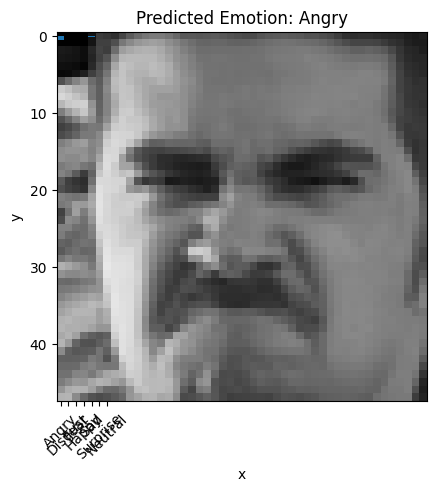

In [3]:


# Assuming you've already loaded the model
# If you haven't loaded it, you can use:
model = tf.keras.models.load_model('model8')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = 'angry_train.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image
img_array = img_array / 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class_index]

# Visualize the image
plt.imshow(img)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(len(emotion_labels)), emotion_labels, rotation=45)
plt.bar(range(len(predictions[0])), predictions[0])
plt.show()


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
tf.test.is_gpu_available()


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

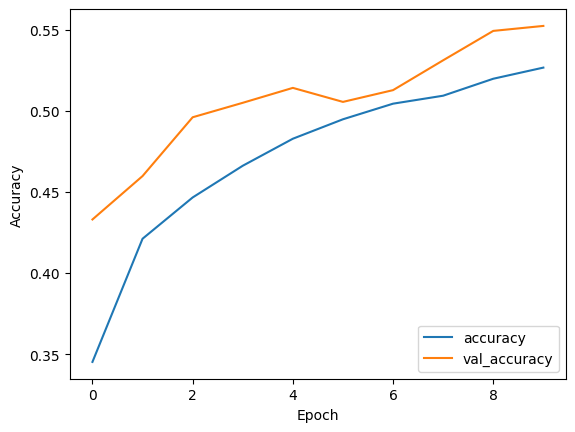

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [3]:
model = tf.keras.models.load_model('model8')
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 6400)              0         
                                                                 
 dropout_4 (Dropout)         (None, 6400)            